In [18]:
import pandas as pd

train_df = pd.read_csv('比赛训练集.csv', encoding='gbk')
test_df = pd.read_csv('比赛测试集.csv', encoding='gbk')

print('训练集的数据大小: ', train_df.shape)
print('测试集的数据大小: ', test_df.shape)
print('-'*30)
print('训练集的数据类型: ')
print(train_df.dtypes)
print('-'*30)
print(test_df.dtypes)

训练集的数据大小:  (4000, 9)
测试集的数据大小:  (1000, 9)
------------------------------
训练集的数据类型: 
编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压           int64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
dtype: object
------------------------------
编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压         float64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
dtype: object


In [2]:
print(train_df.isnull().sum())
print('-'*30)
print(test_df.isnull().sum())

print('-'*30)
print('查看训练集中数据的相关性')
print(train_df.corr())
print(test_df.corr())

编号            0
性别            0
出生年份          0
体重指数          0
糖尿病家族史        0
舒张压         247
口服耐糖量测试       0
胰岛素释放实验       0
肱三头肌皮褶厚度      0
患有糖尿病标识       0
dtype: int64
------------------------------
编号           0
性别           0
出生年份         0
体重指数         0
糖尿病家族史       0
舒张压         49
口服耐糖量测试      0
胰岛素释放实验      0
肱三头肌皮褶厚度     0
dtype: int64
------------------------------
查看训练集中数据的相关性
                编号        性别      出生年份      体重指数       舒张压   口服耐糖量测试  \
编号        1.000000  0.006603 -0.006693  0.000028  0.003495 -0.005840   
性别        0.006603  1.000000 -0.119563  0.075186  0.078870  0.011463   
出生年份     -0.006693 -0.119563  1.000000 -0.074603 -0.154631  0.002085   
体重指数      0.000028  0.075186 -0.074603  1.000000  0.159903 -0.001796   
舒张压       0.003495  0.078870 -0.154631  0.159903  1.000000 -0.020317   
口服耐糖量测试  -0.005840  0.011463  0.002085 -0.001796 -0.020317  1.000000   
胰岛素释放实验   0.020441 -0.053597  0.058585 -0.034507 -0.206663  0.093715   
肱三头肌皮褶厚度  0.030330  0.014037

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24739 (\N{CJK UNIFIED IDEOGRAPH-60A3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23615 (\N{CJK UNIFIED IDEOGRAPH-5C3F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30149 (\N{CJK UNIFIED IDEOGRAPH-75C5}) missing from c

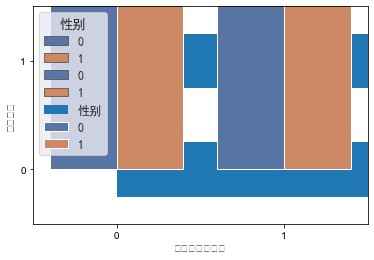

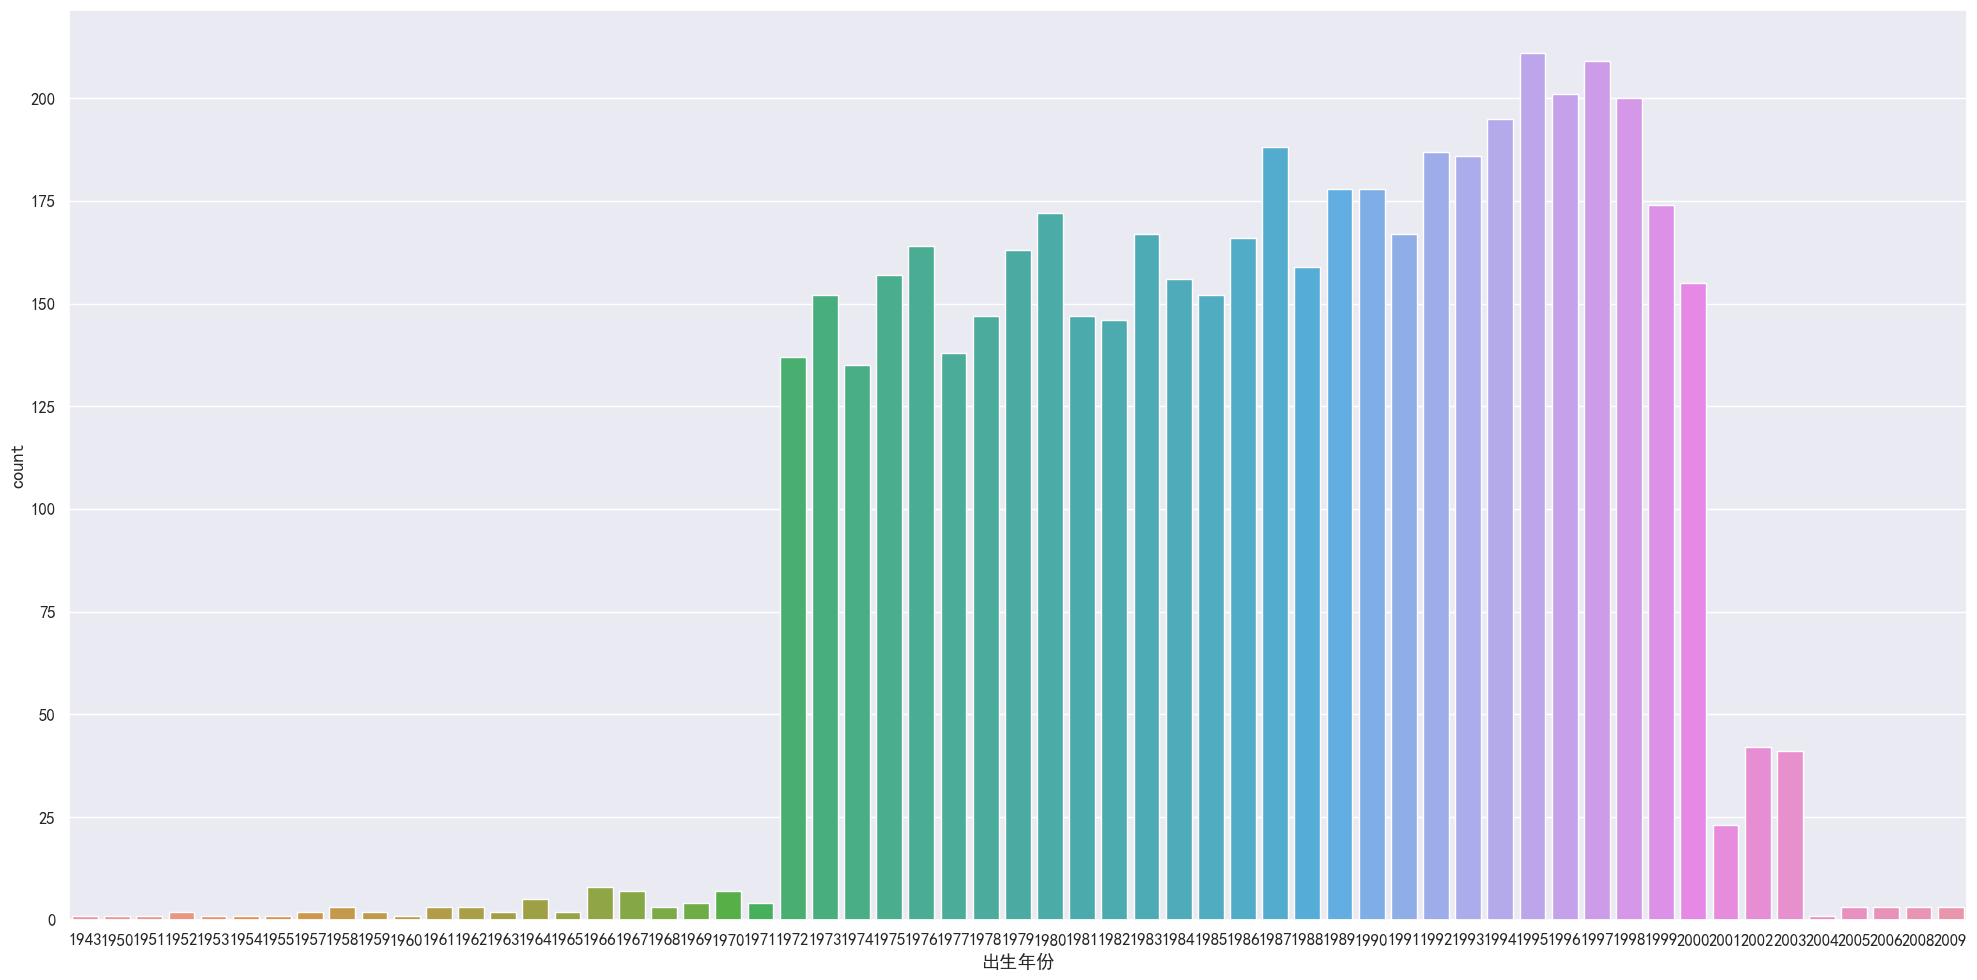

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df['性别'].value_counts().plot(kind='barh')
sns.set(font='SimHei',font_scale=1.1)
sns.countplot(x='患有糖尿病标识', hue='性别', data=train_df)
sns.boxplot(y='出生年份', x='患有糖尿病标识', hue='性别', data=train_df)
sns.violinplot(y='出生年份', x='患有糖尿病标识', hue='性别', data=train_df)

plt.figure(figsize = [20, 10], dpi=100)
sns.countplot(x='出生年份', data=train_df)
plt.tight_layout()

In [4]:
dict_糖尿病家族史 = {
    '无记录': 0,
    '叔叔或姑姑有一方患有糖尿病': 1,
    '叔叔或者姑姑有一方患有糖尿病': 1,
    '父母有一方患有糖尿病': 2
}

train_df['糖尿病家族史'] = train_df['糖尿病家族史'].map(dict_糖尿病家族史)
test_df['糖尿病家族史'] = test_df['糖尿病家族史'].map(dict_糖尿病家族史)

train_df['舒张压'].fillna(0, inplace=True)
test_df['舒张压'].fillna(0, inplace=True)

train_df['出生月份'] = 2022 - train_df['出生年份']
test_df['出生月份'] = 2022 - test_df['出生年份']

def resetAge(input):
    if input <= 18:
        return 0
    elif 19 <= input <= 30:
        return 1
    elif 31 <= input <= 50:
        return 2
    elif input >= 51:
        return 3
    
train_df['rAge'] = train_df['出生年份'].apply(resetAge)
test_df['rAge'] = test_df['出生年份'].apply(resetAge)

def BMI(a):
    if a < 18.5:
        return 0
    elif 18.5<=a<=24:
        return 1
    elif 24<=a<=27:
        return 2
    elif 27<=a<=32:
        return 3
    else:
        return 4
    
train_df['BMI'] = train_df['体重指数'].apply(BMI)
test_df['BMI'] = test_df['体重指数'].apply(BMI)

def DBP(a):
    if a == 0:
        return 0
    elif 0<a<60:
        return 1
    elif 60<=a<=90:
        return 2
    else:
        return 3

train_df['DBP'] = train_df['舒张压'].apply(DBP)
test_df['DBP'] = test_df['舒张压'].apply(DBP)

train_df = train_df.drop(['编号'], axis=1)
test_df = test_df.drop(['编号'], axis=1)

train_df['口服耐糖量测试_diff'] = abs(train_df['口服耐糖量测试'] - train_df.groupby('糖尿病家族史').transform('mean')['口服耐糖量测试'])
test_df['口服耐糖量测试_diff'] = abs(test_df['口服耐糖量测试'] - test_df.groupby('糖尿病家族史').transform('mean')['口服耐糖量测试'])

In [6]:
train_label = train_df['患有糖尿病标识']

train = train_df.drop(['患有糖尿病标识','出生年份'],axis=1)

test = test_df.drop(['出生年份'],axis=1)
print(train)
print(test)

      性别  体重指数  糖尿病家族史    舒张压  口服耐糖量测试  胰岛素释放实验  肱三头肌皮褶厚度  出生月份  rAge  BMI  \
0      0  30.1       0  106.0    3.818     7.89       0.0    26     3    3   
1      0  27.5       0   84.0   -1.000     0.00      14.7    34     3    3   
2      1  36.5       0   85.0    7.131     0.00      40.1    34     3    4   
3      1  29.5       0   91.0    7.041     0.00       0.0    30     3    3   
4      0  42.0       1    0.0    7.134     0.00       0.0    24     3    4   
...   ..   ...     ...    ...      ...      ...       ...   ...   ...  ...   
5065   1  36.4       2   95.0    3.102     0.00       0.0    30     3    4   
5066   1  37.1       1   94.0    6.207     6.77       0.0    31     3    4   
5067   0  25.4       0   90.0    7.343     0.00       0.0    47     3    2   
5068   0  28.5       2  101.0    6.268     8.99       0.0    50     3    3   
5069   0  49.9       0   88.0    3.732    29.71       0.0    46     3    4   

      DBP  口服耐糖量测试_diff  
0       3      1.723772  
1       2  

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression


train_label=train_df['患有糖尿病标识']
train = train_df.drop(['患有糖尿病标识','出生年份'],axis=1)
test = test_df.drop(['出生年份'],axis=1)
#分割训练集和验证集
train_x,val_x,train_y,val_y=train_test_split(train,train_label,test_size=0.25,random_state=2020)
model={}
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['lr']=LogisticRegression()
for i in model:
    model[i].fit(train_x,train_y)
    score=cross_val_score(model[i],val_x,val_y,cv=5,scoring='f1')
    print('%s的f1为：%.3f'%(i,score.mean()))

"""
rfc的f1为：0.927
gdbt的f1为：0.925
cart的f1为：0.899
knn的f1为：0.811
svm的f1为：0.751
lr的f1为：0.718
"""

rfc的f1为：0.929
gdbt的f1为：0.926
cart的f1为：0.898
knn的f1为：0.809
svm的f1为：0.744


C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

lr的f1为：0.746


'\nrfc的f1为：0.927\ngdbt的f1为：0.925\ncart的f1为：0.899\nknn的f1为：0.811\nsvm的f1为：0.751\nlr的f1为：0.718\n'

In [16]:
model=RandomForestClassifier(max_depth=17,min_samples_leaf=2,n_estimators=100)
model.fit(train,train_label)
pre_y=model.predict(test)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y
result.to_csv('result.csv',index=False)